##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

##Loading datasets

In [2]:
df=pd.read_csv("/content/indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


##Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


###Imputing missing values

In [4]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.Albumin_and_Globulin_Ratio =df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean())

###Encoding the qualitative data

In [6]:
df=pd.get_dummies(df)
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


###Converting the result to be predicted into suitable form

In [7]:
from sklearn.preprocessing import LabelBinarizer
LabelBinarizer_x=LabelBinarizer()
df['Dataset']=LabelBinarizer_x.fit_transform(df['Dataset'])
df['Dataset']

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64

###Correlational Analysis
----> 1,-1 indicates the closest correlation

----> 0 indicates no relation

In [8]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319,0.003404,-0.003404
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000,0.082416,-0.082416


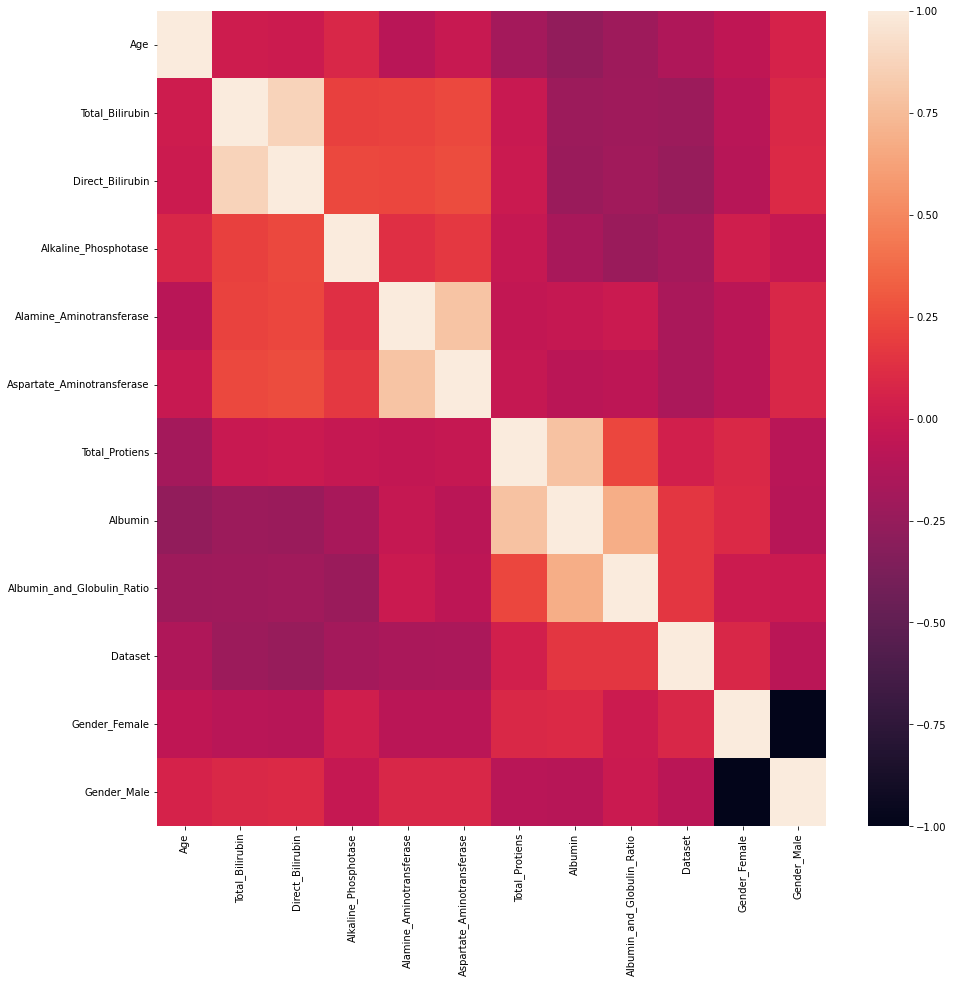

In [9]:
plt.figure(figsize=(15,15))
sn.heatmap(df.corr())

#EDD (Extended Data Dictionary)

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,0.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000,1.000000


##Outliers detection and treatment

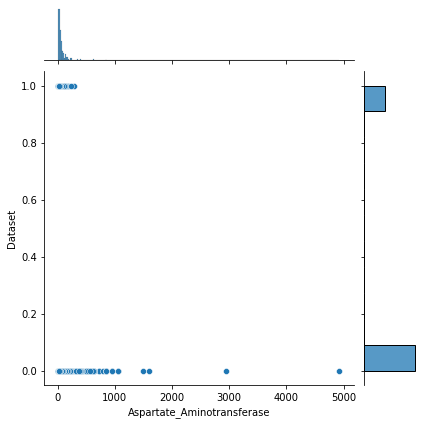

In [11]:
sn.jointplot(x='Aspartate_Aminotransferase',y='Dataset',data=df)

In [12]:
uv=np.percentile(df.Aspartate_Aminotransferase,[99])[0]
uv

976.1999999999955

In [13]:
df.Aspartate_Aminotransferase[df.Aspartate_Aminotransferase>3*uv]=3*uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##Data preparation

In [14]:
x=df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]].values
y=df.iloc[:,9].values
x,y

(array([[65.  ,  0.7 ,  0.1 , ...,  0.9 ,  1.  ,  0.  ],
        [62.  , 10.9 ,  5.5 , ...,  0.74,  0.  ,  1.  ],
        [62.  ,  7.3 ,  4.1 , ...,  0.89,  0.  ,  1.  ],
        ...,
        [52.  ,  0.8 ,  0.2 , ...,  1.  ,  0.  ,  1.  ],
        [31.  ,  1.3 ,  0.5 , ...,  1.  ,  0.  ,  1.  ],
        [38.  ,  1.  ,  0.3 , ...,  1.5 ,  0.  ,  1.  ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0

In [15]:
x.shape

(583, 11)

In [16]:
y.shape

(583,)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

##Splitting train and test data

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

##Standaradization of Data

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

##Model training and prediction

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.predict_proba(x_test)

array([[9.69454547e-01, 3.05454532e-02],
       [9.99985361e-01, 1.46388656e-05],
       [6.02630325e-01, 3.97369675e-01],
       [9.74975034e-01, 2.50249659e-02],
       [6.93513499e-01, 3.06486501e-01],
       [5.74175057e-01, 4.25824943e-01],
       [9.93364019e-01, 6.63598118e-03],
       [7.25251179e-01, 2.74748821e-01],
       [9.60323091e-01, 3.96769095e-02],
       [5.16981737e-01, 4.83018263e-01],
       [5.65523191e-01, 4.34476809e-01],
       [6.76048785e-01, 3.23951215e-01],
       [4.78159202e-01, 5.21840798e-01],
       [6.11864609e-01, 3.88135391e-01],
       [7.99752974e-01, 2.00247026e-01],
       [8.92931659e-01, 1.07068341e-01],
       [9.88902067e-01, 1.10979333e-02],
       [4.75750020e-01, 5.24249980e-01],
       [8.70525094e-01, 1.29474906e-01],
       [6.65689541e-01, 3.34310459e-01],
       [9.76366907e-01, 2.36330930e-02],
       [4.71136064e-01, 5.28863936e-01],
       [6.48208771e-01, 3.51791229e-01],
       [8.98925597e-01, 1.01074403e-01],
       [9.718859

In [60]:
model.intercept_

array([-1.78105018])

In [59]:
model.coef_

array([[-3.34063215e-01, -3.09102288e-01, -8.01384546e-01,
        -2.67475887e-01, -1.39244951e+00, -1.00597469e+00,
        -4.97778626e-01,  5.19185182e-01, -1.14418592e-01,
         7.79557169e-04, -7.79557169e-04]])

In [21]:
y_pred=model.predict(x_test)
y_test,y_pred

(array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0]))

##Accuracy calculation

In [22]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
metrics.accuracy_score(y_test,y_pred)

[[73  5]
 [30  9]]


0.7008547008547008

##**Performance Metrics**


*   Precision = True positive / (True positives + False positives)


*   Recall = True positive / (True positives + False negatives)


*   AUC (ROC - RECEIVER OPERATING CHARACTERISTICS)






In [23]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
precision_score(y_test,y_pred)

0.6428571428571429

In [24]:
recall_score(y_test,y_pred)

0.23076923076923078

In [25]:
roc_auc_score(y_test,y_pred)

0.5833333333333334

##Linear Discriminant Analysis

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred_lda=lda.predict(x_test)
y_pred_lda

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [27]:
metrics.confusion_matrix(y_test,y_pred_lda)

array([[76,  2],
       [37,  2]])

In [28]:
metrics.accuracy_score(y_test,y_pred_lda)

0.6666666666666666

##K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_1=KNeighborsClassifier(n_neighbors=1) #hyperparameter=1
knn_1.fit(x_train,y_train)
y_pred_knn1=knn_1.predict(x_test)
metrics.accuracy_score(y_test,y_pred_knn1)

0.6837606837606838

In [49]:
knn_3=KNeighborsClassifier(n_neighbors=3)#hyperparameter=3
knn_3.fit(x_train,y_train)
y_pred_knn3=knn_3.predict(x_test)
metrics.accuracy_score(y_test,y_pred_knn3)

0.6153846153846154

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
params={'n_neighbors':[1,2,3,4,5,6,8,9,10]}

In [52]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [53]:
grid_search_cv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 9, 10]})

In [54]:
grid_search_cv.best_params_

{'n_neighbors': 2}

In [55]:
optimized_knn=grid_search_cv.best_estimator_

In [56]:
y_pred_opknn=optimized_knn.predict(x_test)

In [57]:
metrics.accuracy_score(y_test,y_pred_opknn)

0.6666666666666666

From the above models, we are able to get the highest accuracy from the Logistic regression model for our data set